In [29]:
import statsmodels.api as sm
import numpy as np

In [91]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance)*np.random.randn(*size)

np.random.seed(12345)
N = 50
x1 = np.linspace(0, 30, N)
x2 = np.sin(x1)
x3 = (x1 + 2)**2
X = np.c_[x1, x2, x3]
eps = dnorm(0, 50, size=N)
beta = [0.1, 0.3, 0.5]
y_true = np.dot(X, beta)
y = y_true + eps

In [92]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.541e+04
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.54e-70
Time:                        13:20:25   Log-Likelihood:                -172.64
No. Observations:                  50   AIC:                             351.3
Df Residuals:                      47   BIC:                             357.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2866      0.305      0.938      0.3

In [89]:
x4 = np.linspace(30,40,20)
x5 = np.sin(x4)
x6 = (x4 + 2)**2
X_new = np.c_[x4, x5, x6]
y_predicted = result.predict(X_new)

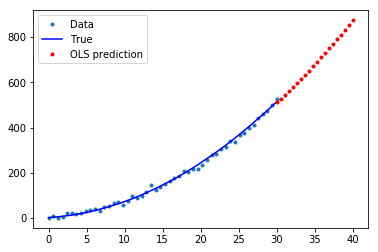

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, '.', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack(x4), np.hstack(y_predicted), 'r', label="OLS prediction")
ax.legend(loc="best");